In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics.pairwise import cosine_similarity

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
# Install Empath tool for analyzing text across lexical categories
import sys
!{sys.executable} -m pip install empath

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [34]:
from empath import Empath

In [35]:
df = pd.read_csv("./data/Combined_News_DJIA.csv", header = 0, index_col = 0)

In [36]:
#df.head()

In [37]:
#df.tail()

In [38]:
df.shape

(1989, 26)

In [39]:
df.iloc[1][1]

"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'"

In [40]:
df.columns[1:]

Index([u'Top1', u'Top2', u'Top3', u'Top4', u'Top5', u'Top6', u'Top7', u'Top8',
       u'Top9', u'Top10', u'Top11', u'Top12', u'Top13', u'Top14', u'Top15',
       u'Top16', u'Top17', u'Top18', u'Top19', u'Top20', u'Top21', u'Top22',
       u'Top23', u'Top24', u'Top25'],
      dtype='object')

In [41]:
headlines = df.as_matrix(columns = df.columns[1:])

In [42]:
headlines.shape

(1989L, 25L)

In [43]:
headlines =[' '.join(map(str, headline)) for headline in headlines]

In [44]:
headlines[1]

'b\'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?\' b\'Bush puts foot down on Georgian conflict\' b"Jewish Georgian minister: Thanks to Israeli training, we\'re fending off Russia " b\'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired\' b"Olympic opening ceremony fireworks \'faked\'" b\'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?\' b\'Russia angered by Israeli military sale to Georgia\' b\'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people\' b\'Welcome To World War IV! Now In High Definition!\' b"Georgia\'s move, a mistake of monumental proportions " b\'Russia presses deeper into Georgia; U.S. says regime change is goal\' b\'Abhinav Bindra wins first ever Individual Olympic Gold Medal for India\' b\' U.S. ship heads for Arctic to define territory\' b\'Drivers in a Jerusalem taxi station threaten to quit ra

In [45]:
def tokenize(text):
    return [x.lower() for x in re.findall(r"([A-Za-z]+)", text)]
    raise NotImplementedError()

In [46]:
import nltk
#nltk.download()
from nltk.tag import pos_tag
def meanless(word):
    if pos_tag([word])[0][1] in ['DT','CC','IN']:
        return True

In [49]:
for i in range(len(headlines)):
    tl = tokenize(headlines[i])
    for e in tl:
        if e=="b":tl.remove(e)
        if meanless(e):tl.remove(e)
    headlines[i] = " ".join(tl)
    progress = i/15
    if progress%10==0:
        print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964


In [50]:
headlines[1]

'why wont america nato help us they wont help us now why did we help them iraq bush puts foot down georgian conflict jewish georgian minister thanks to israeli training we re fending russia georgian army flees disarray russians advance gori abandoned to russia shot fired olympic opening ceremony fireworks faked what were mossad fraudulent new zealand passports doing iraq russia angered israeli military sale to georgia american citizen living s ossetia blames u s georgian leaders genocide innocent people welcome to world war iv now high definition georgia s move mistake monumental proportions russia presses deeper georgia u s says regime change is goal abhinav bindra wins first ever individual olympic gold medal india u s ship heads arctic to define territory drivers jerusalem taxi station threaten to quit rather work their new boss arab french team is stunned phelps x m relay team israel us georgian aggression do not believe tv russian georgian there are much more victims riots are sti

In [51]:
headlines_train = headlines[:1500]
headlines_test = headlines[1500:]
DJIA_train = df.Label[:1500].values
DJIA_test = df.Label[1500:].values

In [283]:
wu = []
wd = []
for i in range(1500):
    if df.Label[i]==1:
        wu = wu+tokenize(headlines[i])
    else:
        wd = wd+tokenize(headlines[i])
wall = wu+wd
print len(wu)
print len(wd)
distinctwu = set(wu)
distinctwd = set(wd)
print len(distinctwu)
print len(distinctwd)
commonw = distinctwu & distinctwd
print len(commonw)
spwu = distinctwu - commonw
spwd = distinctwd - commonw
print len(spwu)
print len(spwd)
spw = spwu | spwd
print len(spw)

289675
245132
22933
21102
14429
8504
6673
15177


In [328]:
dwall = distinctwu | distinctwd
print len(dwall)
i = 0
cw = []
for w in dwall:
    if i%10==0:print i/10
    cw.append(wall.count(w))
    i = i+1

29606
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275


1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109


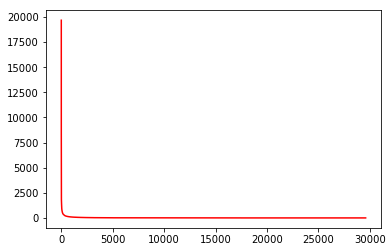

In [329]:
cw.sort()
cw.reverse()
plt.figure()
plt.plot(range(len(cw)),cw,'r')
plt.show()

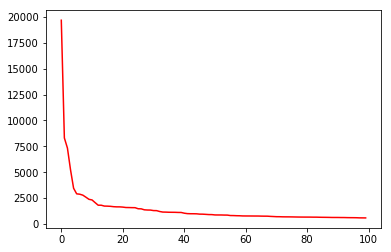

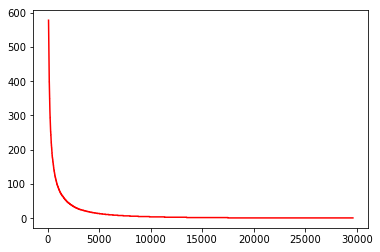

In [338]:
plt.figure()
plt.plot(range(100),cw[:100],'r')
plt.show()
plt.figure()
plt.plot(range(100,len(cw)),cw[100:],'r')
plt.show()

In [297]:
spwl = list(spw)
i = 0
csw = []
for w in spw:
    if i%10==0:print i/10
    csw.append(wall.count(w))
    if wall.count(w)<2:
        spwl.remove(w)
    i = i+1
print len(spwl)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

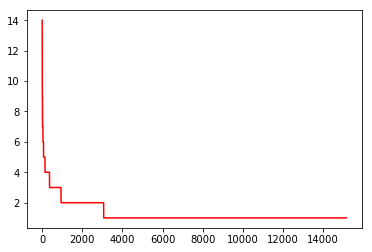

In [311]:
csw.sort()
csw.reverse()
plt.figure()
plt.plot(range(len(csw)),csw,'r')
plt.show()

In [312]:
spwl2 = list(spwl)
i = 0
for w in spwl:
    if i%10==0:print i/10
    if wall.count(w)<3:
        spwl2.remove(w)
    i = i+1
print len(spwl2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [128]:
# percentage of market up on test days.
float(sum(DJIA_test))/len(headlines_test)

0.5173824130879345

In [134]:
df.Label[1499]

0

In [136]:
# accuracy of daily reversal prediction on test days.
dl = np.array(DJIA_test)
dl_p = np.zeros(len(dl))
dl_p[0] = df.Label[1499]
s = 0
for i in range(len(dl)):
    if (i!=0):dl_p[i] = dl[i-1]
    if (dl_p[i]==dl[i]):
        s = s+1
print 1-float(s)/len(dl)

0.533742331288


In [53]:
#headlines[0]

In [54]:
# CountVectorizer(N\A)
basicvectorizer = CountVectorizer(ngram_range=(3,3))
train_term_document_matrix_basic = basicvectorizer.fit_transform(headlines_train)
test_term_document_matrix_basic = basicvectorizer.transform(headlines_test)

In [320]:
# TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(min_df=0.03, max_df=0.1, max_features = 2000, vocabulary = list(spwl),ngram_range = (1, 1))
train_term_document_matrix_tfidf = tfidfvectorizer.fit_transform(headlines_train)
test_term_document_matrix_tfidf = tfidfvectorizer.transform(headlines_test)

In [321]:
print train_term_document_matrix_tfidf.shape
print test_term_document_matrix_tfidf.shape

(1500, 3064)
(489, 3064)


In [322]:
from sklearn.linear_model import LogisticRegression
# LASSO
logit = LogisticRegression(penalty='l1')
logit_fit = logit.fit(train_term_document_matrix_tfidf, DJIA_train)
logit_predict = logit.predict(test_term_document_matrix_tfidf)
accu = sum(DJIA_test == logit_predict)/float(len(DJIA_test))
accu

0.5112474437627812

In [327]:
#tfidfvectorizer.get_feature_names()
tfidfvectorizer.get_feature_names()

['writings',
 'francesco',
 'woody',
 'disobeying',
 'ruck',
 'truong',
 'outwit',
 'shaving',
 'wracked',
 'bugging',
 'guardsmen',
 'trawling',
 'concedes',
 'defenses',
 'contributed',
 'warmongering',
 'designing',
 'solis',
 'cancellation',
 'projection',
 'classification',
 'prodigy',
 'trollies',
 'accommodation',
 'heralded',
 'paperwork',
 'relay',
 'hurl',
 'schoolboys',
 'luzhkov',
 'deprivation',
 'phrase',
 'dragons',
 'organizer',
 'worldview',
 'handguns',
 'salmond',
 'dignified',
 'averages',
 'adoptions',
 'modest',
 'ghadafi',
 'helsinki',
 'attracts',
 'hetherington',
 'handcuff',
 'rewarded',
 'stevens',
 'admirable',
 'tegucigalpa',
 'commemorate',
 'jamali',
 'defecate',
 'component',
 'fraudster',
 'interfering',
 'swathe',
 'brutalised',
 'jobseekers',
 'borno',
 'borne',
 'syntagma',
 'compass',
 'obstructing',
 'diabetic',
 'reprimanded',
 'secularist',
 'lifejacket',
 'speeds',
 'rabid',
 'landlords',
 'shopped',
 'clarity',
 'solstice',
 'basketball',
 'liv

### KNN

In [324]:
def KNN(X_train, Y_train, X_test, Y_test, K):
    """
    X_train: term_doc_matrix
    Y_train: list
    X_test: term_doc_matrix
    Y_test: list
    K: integer
    """
    pred = np.zeros(len(Y_test), dtype = 'int64')
    inverted_index_test = { i[0]:i[1] for i in list(zip(range(len(Y_test)),Y_test))}
    inverted_index_train= { i[0]:i[1] for i in list(zip(range(len(Y_train)),Y_train))}
    sim_score_matrix_K =  cosine_similarity(X_test, X_train)
    for j in range(sim_score_matrix_K.shape[0]):
        highest_K_score_index = np.argsort(sim_score_matrix_K[j])[-K:]
        DJIA_K = [inverted_index_train[idx] for idx in highest_K_score_index]
        Prob = (sum(DJIA_K)+0.)/len(DJIA_K) #smoothing
        if Prob >= 0.5:
            pred[j] = 1
        else:
            pred[j] = 0
    accu = np.mean(Y_test == pred)
    return accu

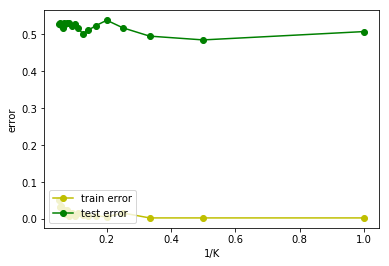

In [325]:
# TfidfVectorizer
train_error =[1- KNN(train_term_document_matrix_tfidf, DJIA_train, train_term_document_matrix_tfidf, DJIA_train, K) for K in range(1, 20)]
test_error = [1- KNN(train_term_document_matrix_tfidf, DJIA_train, test_term_document_matrix_tfidf, DJIA_test, K) for K in range(1, 20)]
one_over_k = [1.0/K for K in range(1, 20)]
plt.plot(one_over_k, train_error, '-yo', label = 'train error')
plt.plot(one_over_k, test_error, '-go', label = 'test error')
plt.ylabel('error')
plt.xlabel('1/K')
plt.legend(loc = 'lower left')

In [326]:
#For example, when K=5, the corresponding training and test errors are:
print "training error:",1- KNN(train_term_document_matrix_tfidf, DJIA_train, train_term_document_matrix_tfidf, DJIA_train, K)
print "test error:",1- KNN(train_term_document_matrix_tfidf, DJIA_train, test_term_document_matrix_tfidf, DJIA_test, K)

training error: 0.052
test error: 0.527607361963


### Logistic

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
logit = LogisticRegression()
logit_fit = logit.fit(train_term_document_matrix_basic, DJIA_train)
logit_predict = logit.predict(test_term_document_matrix_basic)
accu = sum(DJIA_test == logit_predict)/float(len(DJIA_test))
accu

0.51533742331288346

In [181]:
# LASSO
logit = LogisticRegression(penalty='l1')
logit_fit = logit.fit(train_term_document_matrix_tfidf, DJIA_train)
logit_predict = logit.predict(test_term_document_matrix_tfidf)
accu = sum(DJIA_test == logit_predict)/float(len(DJIA_test))
accu

0.48057259713701433

In [182]:
# Ridge
logit = LogisticRegression(penalty='l2')
logit_fit = logit.fit(train_term_document_matrix_tfidf, DJIA_train)
logit_predict = logit.predict(test_term_document_matrix_tfidf)
accu = sum(DJIA_test == logit_predict)/float(len(DJIA_test))
accu

0.47648261758691207

### Rocchio Classification

In [81]:
def Rocchio(X_train, Y_train, X_test, Y_test):
    """
    X_train: term_doc_matrix
    Y_train: list
    X_test: term_doc_matrix
    Y_test: list
    """
    pred = np.zeros(len(Y_test), dtype = 'int64')
    X_train_1 = X_train[np.array(Y_train) == 1, :]
    X_train_0 = X_train[np.array(Y_train) == 0, :]
    Centriod_1 = (np.sum(X_train_1, axis = 0)+0.)/X_train_1.shape[0]
    Centriod_0 = (np.sum(X_train_0, axis = 0)+0.)/X_train_0.shape[0]
    for j in range(len(Y_test)):
        distance_1 = np.sqrt(np.sum(np.square(X_test[j]-Centriod_1)))
        distance_0 = np.sqrt(np.sum(np.square(X_test[j]-Centriod_0)))
        if distance_1 <= distance_0:
            pred[j] = 1
        else:
            pred[j] = 0
    accu = np.mean(Y_test == pred)
    return accu

In [82]:
# test_accuracy
Rocchio(train_term_document_matrix_tfidf, DJIA_train, test_term_document_matrix_tfidf, DJIA_test)

0.49079754601226994

In [83]:
# train_accuracy
Rocchio(train_term_document_matrix_tfidf, DJIA_train, train_term_document_matrix_tfidf, DJIA_train)

0.76466666666666672

### Naive Bayes

In [84]:
from sklearn.naive_bayes import BernoulliNB

In [85]:
BNBclassifier = BernoulliNB(alpha=1)
BNBclassifier.fit(train_term_document_matrix_tfidf, DJIA_train)

BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [86]:
BNBpred = BNBclassifier.predict(test_term_document_matrix_tfidf)
np.mean(BNBpred==DJIA_test)

0.48466257668711654

### Evaluation

In [87]:
BNBclassifier.classes_

array([0, 1], dtype=int64)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
print(confusion_matrix(DJIA_test, BNBpred))

[[ 87 149]
 [103 150]]


In [90]:
print(classification_report(DJIA_test, BNBpred))

             precision    recall  f1-score   support

          0       0.46      0.37      0.41       236
          1       0.50      0.59      0.54       253

avg / total       0.48      0.48      0.48       489



In [91]:
down_probs=BNBclassifier.feature_log_prob_[0,:]

up_probs=BNBclassifier.feature_log_prob_[1,:]

In [92]:
logodds=down_probs-up_probs

In [93]:
terms = tfidfvectorizer.get_feature_names()

In [94]:
print("\nFeatures that are most indicative of DJIA_UP:\n")
for i in np.argsort(logodds)[:10]:
    print(terms[i])
    
print("\n\nFeatures that are most indicative of DJIA_DOWN\n")
for i in np.argsort(-logodds)[:10]:
    print(terms[i])


Features that are most indicative of DJIA_UP:

nigeria
territory
self
parents
non
doctors
irish
satellite
step
jews


Features that are most indicative of DJIA_DOWN

congo
total
low
hacking
tell
republic
sanctions
society
run
speech


### Empath Tool Text Analysis

In [117]:
lexicon = Empath()

In [118]:
df.iloc[1,1]

"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'"

In [119]:
lexicon.analyze(df.iloc[1,1], normalize=True)

{'achievement': 0.0,
 'affection': 0.0,
 'aggression': 0.0,
 'air_travel': 0.0,
 'alcohol': 0.0,
 'ancient': 0.0,
 'anger': 0.0,
 'animal': 0.0,
 'anonymity': 0.0,
 'anticipation': 0.0,
 'appearance': 0.0,
 'art': 0.0,
 'attractive': 0.0,
 'banking': 0.0,
 'beach': 0.0,
 'beauty': 0.0,
 'blue_collar_job': 0.0,
 'body': 0.0,
 'breaking': 0.0,
 'business': 0.0,
 'car': 0.0,
 'celebration': 0.0,
 'cheerfulness': 0.0,
 'childish': 0.0,
 'children': 0.0,
 'cleaning': 0.0,
 'clothing': 0.0,
 'cold': 0.0,
 'college': 0.0,
 'communication': 0.0,
 'competing': 0.0,
 'computer': 0.0,
 'confusion': 0.05,
 'contentment': 0.0,
 'cooking': 0.0,
 'crime': 0.0,
 'dance': 0.0,
 'death': 0.0,
 'deception': 0.0,
 'disappointment': 0.0,
 'disgust': 0.0,
 'dispute': 0.0,
 'divine': 0.0,
 'domestic_work': 0.0,
 'dominant_heirarchical': 0.0,
 'dominant_personality': 0.0,
 'driving': 0.0,
 'eating': 0.0,
 'economics': 0.0,
 'emotional': 0.0,
 'envy': 0.0,
 'exasperation': 0.0,
 'exercise': 0.0,
 'exotic': 0.0

In [120]:
df.iloc[2,2]

'b"Russia \'ends Georgia operation\'"'

In [121]:
lexicon.analyze(df.iloc[2,2], normalize=True)

{'achievement': 0.0,
 'affection': 0.0,
 'aggression': 0.0,
 'air_travel': 0.0,
 'alcohol': 0.0,
 'ancient': 0.0,
 'anger': 0.0,
 'animal': 0.0,
 'anonymity': 0.0,
 'anticipation': 0.0,
 'appearance': 0.0,
 'art': 0.0,
 'attractive': 0.0,
 'banking': 0.0,
 'beach': 0.0,
 'beauty': 0.0,
 'blue_collar_job': 0.0,
 'body': 0.0,
 'breaking': 0.0,
 'business': 0.0,
 'car': 0.0,
 'celebration': 0.0,
 'cheerfulness': 0.0,
 'childish': 0.0,
 'children': 0.0,
 'cleaning': 0.0,
 'clothing': 0.0,
 'cold': 0.0,
 'college': 0.0,
 'communication': 0.0,
 'competing': 0.0,
 'computer': 0.0,
 'confusion': 0.0,
 'contentment': 0.0,
 'cooking': 0.0,
 'crime': 0.0,
 'dance': 0.0,
 'death': 0.0,
 'deception': 0.0,
 'disappointment': 0.0,
 'disgust': 0.0,
 'dispute': 0.0,
 'divine': 0.0,
 'domestic_work': 0.0,
 'dominant_heirarchical': 0.0,
 'dominant_personality': 0.0,
 'driving': 0.0,
 'eating': 0.0,
 'economics': 0.0,
 'emotional': 0.0,
 'envy': 0.0,
 'exasperation': 0.0,
 'exercise': 0.0,
 'exotic': 0.0,

In [122]:
def empath_analyze(doc):
    print (doc)
    result = lexicon.analyze(doc, normalize=True)
    for term, score in result.items():
        if score != 0.:
            print ((term, score))

In [123]:
lexicon.analyze('hit', normalize=True).keys()

['help',
 'office',
 'violence',
 'dance',
 'money',
 'wedding',
 'valuable',
 'domestic_work',
 'sleep',
 'medical_emergency',
 'cold',
 'hate',
 'cheerfulness',
 'aggression',
 'occupation',
 'envy',
 'anticipation',
 'family',
 'crime',
 'attractive',
 'masculine',
 'prison',
 'health',
 'pride',
 'dispute',
 'nervousness',
 'government',
 'weakness',
 'horror',
 'swearing_terms',
 'leisure',
 'suffering',
 'royalty',
 'wealthy',
 'white_collar_job',
 'tourism',
 'furniture',
 'school',
 'magic',
 'beach',
 'journalism',
 'morning',
 'banking',
 'social_media',
 'exercise',
 'night',
 'kill',
 'art',
 'play',
 'computer',
 'college',
 'traveling',
 'stealing',
 'real_estate',
 'home',
 'divine',
 'sexual',
 'fear',
 'monster',
 'irritability',
 'superhero',
 'business',
 'driving',
 'pet',
 'childish',
 'cooking',
 'exasperation',
 'religion',
 'hipster',
 'internet',
 'surprise',
 'reading',
 'worship',
 'leader',
 'independence',
 'movement',
 'body',
 'noise',
 'eating',
 'mediev

In [124]:
categories = list(lexicon.analyze('no', normalize=True).keys())

In [125]:
empath_df = pd.DataFrame()

In [126]:
df.iloc[22, 1:]

Top1     b'Dutch to ban burkas when picking children up...
Top2     b"For 21 years a British man has refused to bu...
Top3       b'War Nerd - Ossetia: all over but the whining'
Top4     b'North Korean Leader Kim Jong-il is Confirmed...
Top5            b'Polish PM Wants Child Abusers Castrated'
Top6                  b'Russian bombers land in Venezuela'
Top7            b'Devastating Landslide Kills 56 in China'
Top8     b'Iran demands UN investigate Israeli "threats...
Top9     b'2 Israeli Human Right Groups: Israel is forc...
Top10    b'125,000 Gorillas Find Haven in Mud Swamp But...
Top11    b'Moroccan blogger insults King, King jails in...
Top12    b'Ralph Peters, the retired US army colonel wh...
Top13                   b"US 'not winning' in Afghanistan"
Top14    b'Earth Policy Institute: Increasing Equality ...
Top15                 b"Israel 'dividing up Palestinians'"
Top16    b'Iran Being Supported by Shell Oil, OMV and M...
Top17    b'Russia sends warplanes on Venezuela training.

In [127]:
def create_empath_df(headlines, lexicon, length, categories):
    """
    df: pd.DataFrame, original headline dataframe
    lexicon: empath object, empath tool
    length: integer, length of the dataframe
    categories: list, list of categories in lexicon
    """
    
    #df_empath = pd.DataFrame(0, index=df.index[:length], columns=categories)
    row_list = []
    for i in range(length):
        row_list.append(lexicon.analyze(headlines[i], normalize=True))
    df_empath = pd.DataFrame(row_list, index=df.index[:length])
    return df_empath

In [128]:
df_empath = create_empath_df(headlines, lexicon, len(headlines), categories)

In [129]:
df_empath.head()

,achievement,affection,aggression,air_travel,alcohol,ancient,anger,animal,anonymity,anticipation,...,wealthy,weapon,weather,wedding,white_collar_job,work,worship,writing,youth,zest
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0.002660,0.0,0.005319,0.000000,0.000000,0.002660,0.002660,0.00000,0.0,0.002660,...,0.000000,0.018617,0.000000,0.002660,0.00000,0.007979,0.000000,0.00000,0.000000,0.00266
2008-08-11,0.007326,0.0,0.010989,0.003663,0.003663,0.000000,0.007326,0.00000,0.0,0.000000,...,0.000000,0.003663,0.000000,0.003663,0.00000,0.007326,0.000000,0.00000,0.003663,0.00000
2008-08-12,0.000000,0.0,0.005618,0.000000,0.000000,0.011236,0.000000,0.00000,0.0,0.000000,...,0.002809,0.002809,0.005618,0.008427,0.00000,0.005618,0.002809,0.00000,0.000000,0.00000
2008-08-13,0.000000,0.0,0.009554,0.000000,0.000000,0.003185,0.000000,0.00000,0.0,0.003185,...,0.000000,0.012739,0.006369,0.003185,0.00000,0.009554,0.000000,0.00000,0.000000,0.00000
2008-08-14,0.007299,0.0,0.014599,0.000000,0.003650,0.000000,0.003650,0.00365,0.0,0.000000,...,0.003650,0.021898,0.000000,0.007299,0.00365,0.000000,0.000000,0.00365,0.003650,0.00000


In [130]:
df_empath.shape

(1989, 194)

In [131]:
df_empath.sum(axis=0).sort_values(ascending = False)

government               30.814840
war                      27.682906
crime                    26.851310
leader                   23.532141
law                      22.557614
negative_emotion         21.967565
fight                    19.016145
kill                     16.842807
business                 16.691671
military                 16.167649
stealing                 16.136096
money                    16.117795
death                    15.466996
weapon                   14.256934
economics                14.069540
violence                 13.947852
dispute                  13.930900
politics                 13.619796
terrorism                13.274906
dominant_heirarchical    13.171573
banking                  13.135727
technology               13.116331
power                    12.651075
work                     12.540823
prison                   12.146124
payment                  11.970496
internet                 11.684798
aggression               11.655634
children            

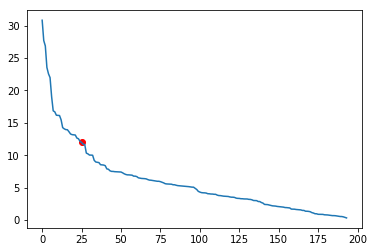

In [132]:
cat_total_scores = df_empath.sum(axis=0).sort_values(ascending = False)
plt.plot(cat_total_scores.values)
plt.scatter(25, cat_total_scores.values[25], color = 'r')

In [133]:
daily_category = df_empath.idxmax(axis=1)

In [134]:
daily_category.value_counts()[:10]

government          472
crime               350
war                 232
leader              136
negative_emotion    112
business             72
law                  63
fight                54
money                45
economics            36
dtype: int64

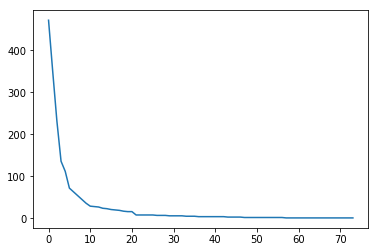

In [135]:
plt.plot(daily_category.value_counts().values)

In [136]:
from collections import defaultdict
cat_to_color = defaultdict(lambda: 'k')

In [137]:
cat_to_color.update({daily_category.value_counts().index[10+i] : 'C'+str(i+1) for i in range(3)})

In [140]:
cat_to_color

defaultdict(<function __main__.<lambda>>,
            {'banking': 'C1', 'internet': 'C2', 'military': 'C3'})

In [141]:
projected_docs.shape[0]

NameError: name 'projected_docs' is not defined

In [142]:
daily_category.shape

(1989L,)

In [143]:
color_to_project = defaultdict(list)
for i in range(projected_docs.shape[0]):
    color_to_project[cat_to_color[daily_category[i]]].append(i)

NameError: name 'projected_docs' is not defined

In [144]:
plt.figure(figsize=(15,15))
for color, indices in color_to_project.items():
    indices = np.array(indices)
    plt.scatter(projected_docs[indices,0], projected_docs[indices,1],
                color = color)
plt.show()

### ML using empath matrix

In [145]:
train_empath_matrix = df_empath[:1500].as_matrix(columns = df_empath.columns)
test_empath_matrix = df_empath[1500:].as_matrix(columns = df_empath.columns)

In [146]:
KNN(train_empath_matrix, DJIA_train, test_empath_matrix, DJIA_test, 15)

0.51329243353783227

In [147]:
Rocchio(train_empath_matrix, DJIA_train, test_empath_matrix, DJIA_test)

0.46625766871165641

In [148]:
logit = LogisticRegression(penalty='l2')
logit_fit = logit.fit(train_empath_matrix, DJIA_train)
logit_predict = logit.predict(test_empath_matrix)
accu = sum(DJIA_test == logit_predict)/len(DJIA_test)
accu

0

In [149]:
BNBclassifier.fit(train_empath_matrix, DJIA_train)
BNBpred = BNBclassifier.predict(test_empath_matrix)
np.mean(BNBpred==DJIA_test)

0.4887525562372188

### LDA topic classification

In [150]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
cv = CountVectorizer(stop_words = 'english', max_df=.7, min_df=50,
                     max_features=6000)
counts = cv.fit_transform(headlines)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [151]:
n_topic = 15
print(counts.shape)
model = LDA(n_topics=n_topic, max_iter=10, n_jobs=4, verbose=1)
res = model.fit_transform(counts)

(1989, 2084)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\decomposition\online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [152]:
feature_names = cv.get_feature_names()
print_top_words(model, feature_names, 20)

Topic #0:
tony blair iraq war children george crimes israel conflict religious gaza bush border white palestinians fear moon israeli workers collapse
Topic #1:
new world people says government china year police years uk germany killed chinese said president news country old man death
Topic #2:
children gaza israel pakistan israeli court russia mumbai official troops self think says al forced bomb stop settlers iran members
Topic #3:
flotilla gaza blockade israel acts hamas hate bombers il corporate states attacks israeli peaceful isn gov gave know went husband
Topic #4:
gaza israel israeli says war killed civilians new water government doctor man police people crimes congo mumbai west ambassador indian
Topic #5:
ukraine russia russian putin ukrainian crimea military mh georgia nato kiev says troops pro moscow poland war crisis south russians
Topic #6:
mumbai pirates somali attacks indian finally ships terrorist israeli terrorists mugabe greece riots euro gunmen seize blasts cables agre

In [153]:
res.shape

(1989L, 15L)

In [154]:
KNN(X_train=res[:1500, :], Y_train=DJIA_train, X_test=res[1500:, :], Y_test=DJIA_test, K=4)

0.52351738241308798

In [155]:
Rocchio(X_train=res[:1500, :], Y_train=DJIA_train, X_test=res[1500:, :], Y_test=DJIA_test)

0.48261758691206547

In [156]:
BNBclassifier.fit(res[:1500, :], DJIA_train)
BNBpred = BNBclassifier.predict(res[1500:, :])
np.mean(BNBpred==DJIA_test)

0.51738241308793453

In [157]:
logit = LogisticRegression(penalty='l2')
logit_fit = logit.fit(res[:1500, :], DJIA_train)
logit_predict = logit.predict(res[1500: , :])
accu = np.mean(DJIA_test == logit_predict)
accu

0.51738241308793453